<a href="https://colab.research.google.com/github/anshikaverma-me/sales-price-prediction/blob/main/Building_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Intershala_Notebook/Transformed_Housing_Data2.csv')

In [ ]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
data['mean_sales']=data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

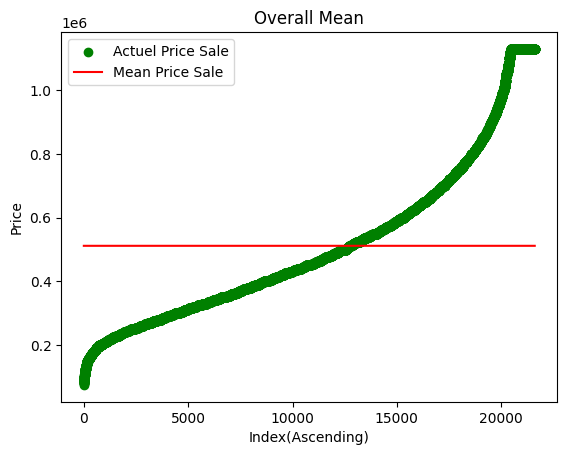

In [ ]:
plt.figure(dpi=100)
k=range(0,len(data))
plt.scatter(k,data['Sale_Price'].sort_values(),color="green",label="Actuel Price Sale")
plt.plot(k,data['mean_sales'].sort_values(),color="red",label="Mean Price Sale")
plt.xlabel("Index(Ascending)")
plt.ylabel("Price")
plt.title("Overall Mean")
plt.legend()

In [ ]:
grades_mean = data.pivot_table(values='Sale_Price', index='Overall Grade', aggfunc=np.mean)
print(grades_mean)

                 Sale_Price
Overall Grade              
1              1.420000e+05
2              1.129575e+06
3              2.056667e+05
4              2.143810e+05
5              2.485240e+05
6              3.018820e+05
7              4.022396e+05
8              5.375841e+05
9              7.369368e+05
10             9.604081e+05


In [ ]:
#making New column
data['grade_mean']=0
for i in grades_mean.index: # Iterate over index (Overall Grade) instead of columns
  data['grade_mean'][data['Overall Grade']==i]=grades_mean.loc[i, 'Sale_Price'] # Access values using .loc
data['grade_mean'].head()

<ipython-input-14-39accfa6bcfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade']==i]=grades_mean.loc[i, 'Sale_Price'] # Access values using .loc
<ipython-input-14-39accfa6bcfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade']==i]=grades_mean.loc[i, 'Sale_Price'] # Access values using .loc
<ipython-input-14-39accfa6bcfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [ ]:
gradewise_list=[]
for i in range(1,11):
  gradewise_list.append(data['grade_mean'][data['Overall Grade']==i])

In [ ]:
classwise_list=[]
for i in range(1,11):
  classwise_list.append(data['Sale_Price'][data['Overall Grade']==i])

ValueError: x and y must be the same size

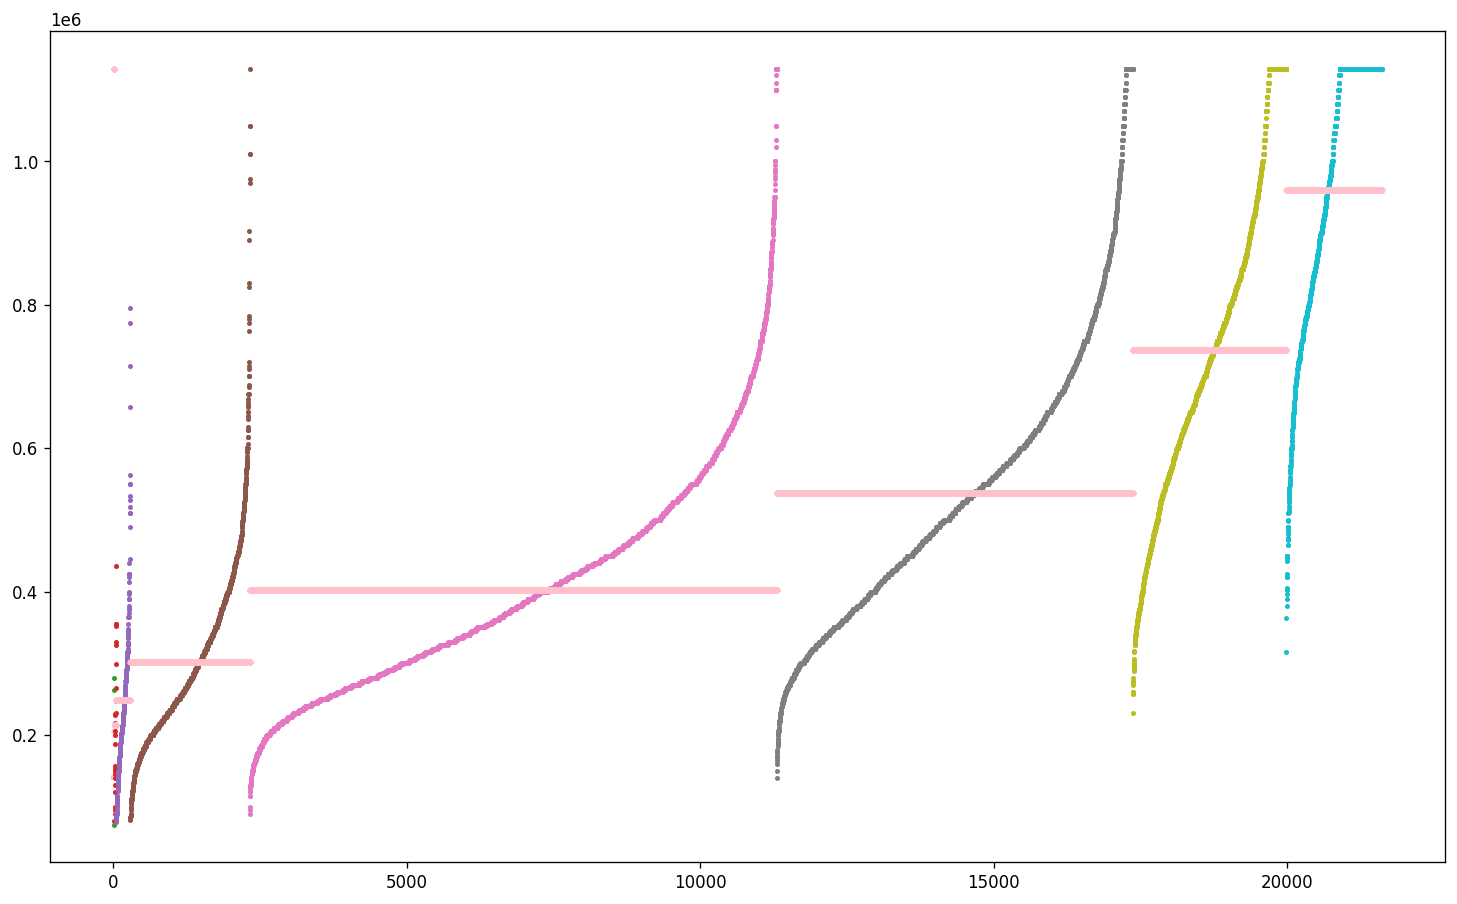

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=120, figsize=(15, 9))
z = 0
total_points = 0  # Initialize total_points to keep track of total number of points

for i in range(1, 11):
    points = [k for k in range(z, z + len(classwise_list[i - 1]))]
    sorted_values = classwise_list[i - 1].sort_values()

    plt.scatter(points, sorted_values, label=f'house with overall grade {i}', s=4)
    plt.scatter(points, [sorted_values.mean()] * len(sorted_values), s=6, color='pink')

    z = max(points) + 1
    total_points = z  # Update total_points to reflect the latest point count

# Create a list of mean sales values with the same length as the total number of points plotted
mean_sales_y = [data['mean_sales']] * total_points

plt.scatter(range(total_points), mean_sales_y, color='red', label='Overall Mean', s=6)

plt.xlabel("Fitted points (Ascending)")
plt.ylabel("Sale Price")
plt.title("Overall Grade")
plt.legend(loc=4)
plt.show()




In [ ]:
#residual plot
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference=data['grade_mean']-data['Sale_Price']

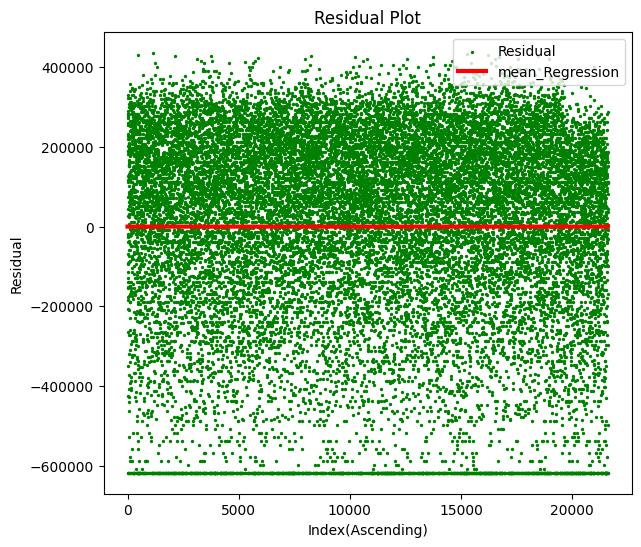

In [ ]:
k=range(0,len(data))
l=[0 for i in range(len(data))]
plt.figure(figsize=(15,6),dpi=100)
plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color='green',label='Residual',s=2)
plt.plot(k,l,color='red',label='mean_Regression',linewidth=3)
plt.xlabel("Index(Ascending)")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.legend()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

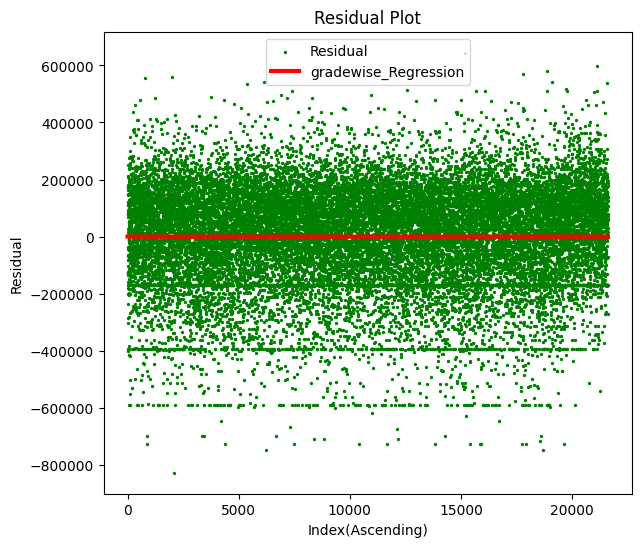

In [ ]:
# prompt: similarly write code for grade_mean_difference

plt.figure(figsize=(15,6),dpi=100)
plt.subplot(1,2,2)
plt.scatter(k,grade_mean_difference,color='green',label='Residual',s=2)
plt.plot(k,l,color='red',label='gradewise_Regression',linewidth=3)
plt.xlabel("Index(Ascending)")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.legend()
plt.show()


In [ ]:
#calculate mean absolute error using scikit library
from sklearn.metrics import mean_absolute_error
cost_grade_mean=mean_absolute_error(data['Sale_Price'],data['grade_mean'])
cost_mean=mean_absolute_error(data['Sale_Price'],data['mean_sales'])
print(cost_grade_mean)
print(cost_mean)


137081.7029820291
199168.7814684109


In [ ]:
#calculate mean square error using scikit library
from sklearn.metrics import mean_squared_error
cost_grade_mean=mean_squared_error(data['Sale_Price'],data['grade_mean'])
cost_mean=mean_squared_error(data['Sale_Price'],data['mean_sales'])
print(cost_grade_mean)
print(cost_mean)

30804835720.342426
62528116847.799576


In [ ]:
#calculate root mean square error using scikit library
from sklearn.metrics import mean_squared_error
cost_grade_mean=np.sqrt(mean_squared_error(data['Sale_Price'],data['grade_mean']))
cost_mean=np.sqrt(mean_squared_error(data['Sale_Price'],data['mean_sales']))
print(cost_grade_mean)
print(cost_mean)

175513.06424406826
250056.2273725643


In [ ]:
y=data['Sale_Price']
y_bar=data['mean_sales']
y_hat=data['grade_mean']
n=len(data)
len(y),len(y_bar),len(y_hat),n

(21609, 21609, 21609, 21609)

In [ ]:
mse_mean=mean_squared_error(y,y_bar)
mse_model=mean_squared_error(y,y_hat)
print(mse_mean)
print(mse_model)

62528116847.799576
30804835720.342426


In [ ]:
R2=1-(mse_model)/mse_mean
print(R2)

0.5073442592981836


In [ ]:
sale_price=data['Sale_Price'].head(30)
flat_area=data['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({'Sale_Price':sale_price,'Flat Area (in Sqft)':flat_area})
sample_data

,Sale_Price,Flat Area (in Sqft)
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


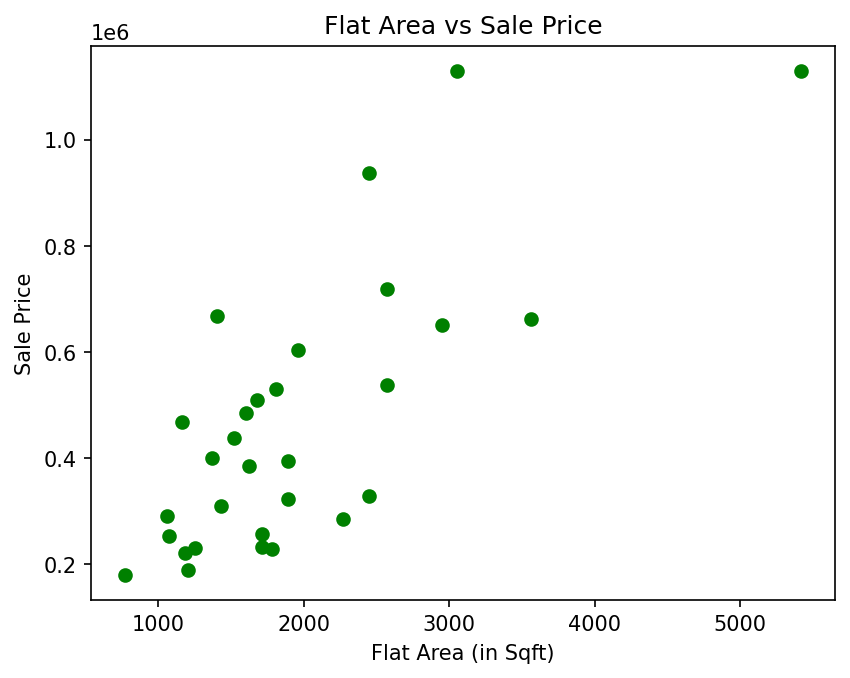

In [ ]:
plt.figure(dpi=150)
plt.scatter(sample_data['Flat Area (in Sqft)'],sample_data['Sale_Price'],color='green')
plt.xlabel('Flat Area (in Sqft)')
plt.ylabel('Sale Price')
plt.title('Flat Area vs Sale Price')
plt.show()

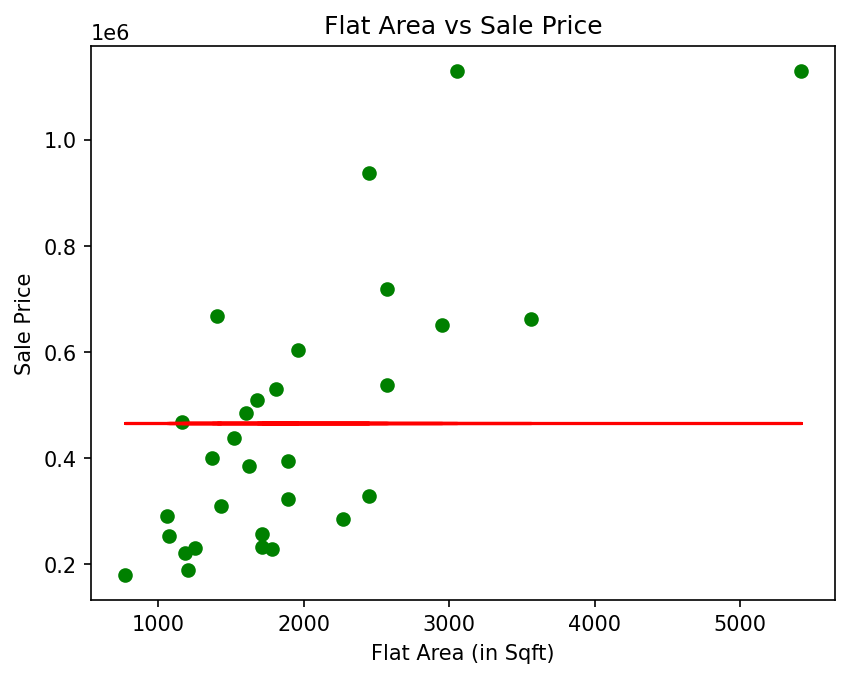

In [ ]:
sample_data['mean_sale_price']=sample_data['Sale_Price'].mean()


plt.figure(dpi=150)
plt.scatter(sample_data['Flat Area (in Sqft)'],sample_data['Sale_Price'],color='green')
plt.plot(sample_data['Flat Area (in Sqft)'],sample_data['mean_sale_price'],color='red')
plt.xlabel('Flat Area (in Sqft)')
plt.ylabel('Sale Price')
plt.title('Flat Area vs Sale Price')
plt.show()

In [ ]:
sample_data = pd.DataFrame({
    'flat_area': np.random.rand(100) * 100,  # Replace with actual data
    'sale_price': np.random.rand(100) * 500  # Replace with actual data
})

def slope_Error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data['flat_area'])):
        tmp = sample_data['flat_area'].iloc[i] * slope + intercept
        sale.append(tmp)
    MSE = mean_squared_error(sample_data['sale_price'], sale)
    return MSE

slopes = [i/10 for i in range(0,1000)]
Cost = []
for i in slopes:
    cost = slope_Error(slope=i, intercept=50, sample_data=sample_data)
    Cost.append(cost)


In [ ]:
#Arranging in DataFrame
Cost_table=pd.DataFrame({'slope':slopes,'cost':Cost})
Cost_table.tail()

,slope,cost
995,99.5,3.437251e+07
996,99.6,3.444355e+07
997,99.7,3.451466e+07
998,99.8,3.458585e+07
999,99.9,3.465711e+07


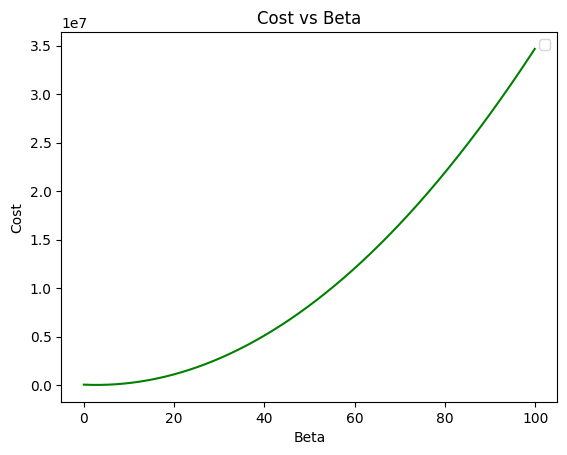

In [ ]:
#plotting the cost value corresponding to every beta value
plt.plot(Cost_table.slope,Cost_table.cost,color='green')
plt.xlabel('Beta')
plt.ylabel('Cost')
plt.title('Cost vs Beta')
plt.legend()
plt.show()

In [ ]:
def intercept_Error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data['flat_area'])):
        tmp = sample_data['flat_area'].iloc[i] * slope + intercept
        sale.append(tmp)
    MSE = mean_squared_error(sample_data['sale_price'], sale)
    return MSE

In [ ]:
intercept =[i for i in range(5000,50000)]
Cost = []

for i in intercept:
    cost = intercept_Error(slope=234, intercept=i, sample_data=sample_data)
    Cost.append(cost)

In [ ]:
#show this table
Cost_table=pd.DataFrame({'intercept':intercept,'cost':Cost})
Cost_table.tail()

,intercept,cost
44995,49995,3.936241e+09
44996,49996,3.936366e+09
44997,49997,3.936491e+09
44998,49998,3.936616e+09
44999,49999,3.936740e+09


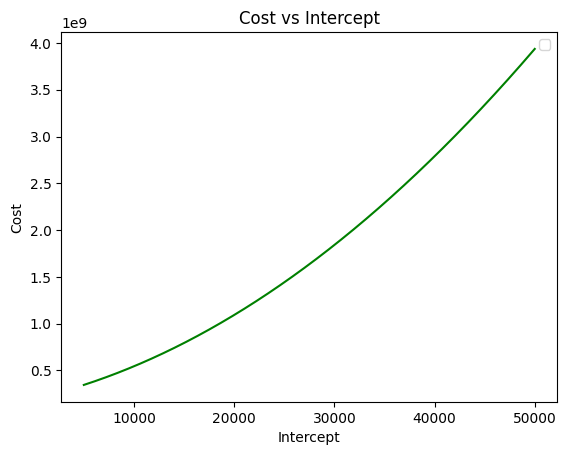

In [ ]:
#plotting cost value corresponding to every value of beta
plt.plot(Cost_table.intercept,Cost_table.cost,color='green')
plt.xlabel('Intercept')
plt.ylabel('Cost')
plt.title('Cost vs Intercept')
plt.legend()
plt.show()

In [ ]:
# Now plot graph with new min value of slope and intercept
slopes = [i/10 for i in range(0,1000)]
Cost = []
for i in slopes:
    cost = slope_Error(slope=i, intercept=10834, sample_data=sample_data)
    Cost.append(cost)



In [ ]:
#Arranging in dataFrame
Cost_table=pd.DataFrame({'slope':slopes,'cost':Cost})
Cost_table.tail()

,slope,cost
995,99.5,2.626451e+08
996,99.6,2.628328e+08
997,99.7,2.630206e+08
998,99.8,2.632085e+08
999,99.9,2.633964e+08


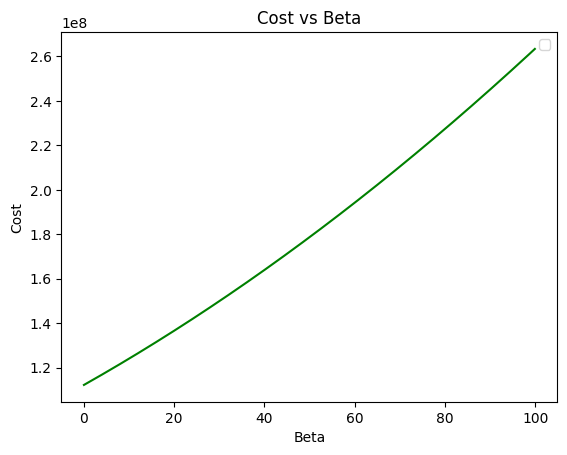

In [ ]:
#plotting the cost value corresponding to every beta value
plt.plot(Cost_table.slope,Cost_table.cost,color='green')
plt.xlabel('Beta')
plt.ylabel('Cost')
plt.title('Cost vs Beta')
plt.legend()
plt.show()

In [ ]:
new_slope=Cost_table['slope'][Cost_table['cost']==Cost_table['cost'].min()].values
new_slope[0]

0.0